Import Dataset

In [82]:
import pandas as pd

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/URLs/Final.csv')

In [85]:
len(df)

600917

In [86]:
df.shape

(600917, 9)

In [87]:
df.columns


Index(['Unnamed: 0', 'url', 'type', 'is_valid_url', 'url_structure',
       'safe_header', 'safe_length', 'safe_domain', 'domain_age'],
      dtype='object')

In [88]:
df.head()

,Unnamed: 0,url,type,is_valid_url,url_structure,safe_header,safe_length,safe_domain,domain_age
0,0,br-icloud.com.br,2.0,0.0,0.0,NaN,1.0,1.0,0.0
1,1,mp3raid.com/music/krizz_kaliko.html,0.0,0.0,0.0,NaN,1.0,1.0,0.0
2,2,bopsecrets.org/rexroth/cr/1.htm,0.0,0.0,0.0,NaN,1.0,1.0,0.0
3,3,http://www.garage-pirenne.be/index.php?option=...,1.0,1.0,0.0,NaN,1.0,1.0,0.0
4,4,http://adventure-nicaragua.net/index.php?optio...,1.0,1.0,0.0,NaN,0.0,1.0,0.0


In [89]:
df = df[['url','is_valid_url','url_structure','safe_length','safe_domain','domain_age','type']]
df.dropna(inplace=True)

<ipython-input-89-e1a83ba90a88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [90]:
df.head()

,url,is_valid_url,url_structure,safe_length,safe_domain,domain_age,type
0,br-icloud.com.br,0.0,0.0,1.0,1.0,0.0,2.0
1,mp3raid.com/music/krizz_kaliko.html,0.0,0.0,1.0,1.0,0.0,0.0
2,bopsecrets.org/rexroth/cr/1.htm,0.0,0.0,1.0,1.0,0.0,0.0
3,http://www.garage-pirenne.be/index.php?option=...,1.0,0.0,1.0,1.0,0.0,1.0
4,http://adventure-nicaragua.net/index.php?optio...,1.0,0.0,0.0,1.0,0.0,1.0


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [92]:
X = df[['is_valid_url',	'url_structure','safe_length','safe_domain','domain_age']]

In [93]:
X['is_valid_url'].value_counts()

0.0    412917
1.0    187999
Name: is_valid_url, dtype: int64

In [94]:
X['url_structure'].value_counts()

0.0    538510
1.0     62406
Name: url_structure, dtype: int64

In [95]:
X['safe_length'].value_counts()

1.0    519860
0.0     81056
Name: safe_length, dtype: int64

In [96]:
X['domain_age'].value_counts()

0.0    600916
Name: domain_age, dtype: int64

In [97]:
Y = df['type']

In [98]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [100]:
# neighbors = list(range(1,50,2))
# neighbors = [9,13]


In [101]:
# cv_scores=[]
# for k in neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
#     cv_scores.append(scores.mean())
#     print("Done")

In [102]:
# cv_scores
X.columns
X.fillna(0)
X.isnull().value_counts()
X.dropna(inplace=True)
X.dropna(inplace=True)
X.dropna(inplace=True)
X.dropna(inplace=True)
X.dropna(inplace=True)


<ipython-input-102-d2aefe9ee576>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-102-d2aefe9ee576>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-102-d2aefe9ee576>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-102-d2aefe9ee576>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [103]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=9)

# fitting the model
# knn_optimal.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# predict the response
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)
# pred = knn_optimal.predict(X_test)
pred = rf_classifier.predict(X_test)
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (9, acc))


The accuracy of the knn classifier for k = 9 is 80.960754%


In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [105]:
conf_matrix = confusion_matrix(y_test,pred)


<Axes: >

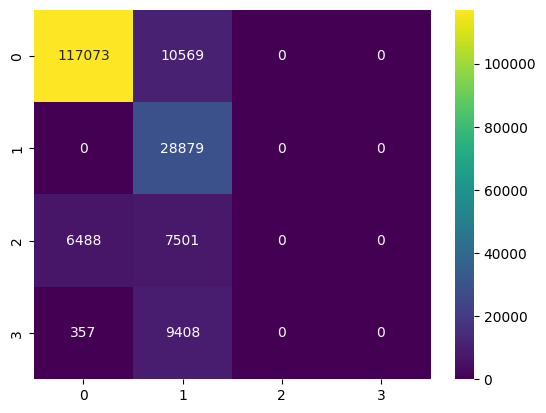

In [106]:
sns.heatmap(conf_matrix,annot=True, cmap='viridis', fmt='g')


In [ ]:
X_test[0]